In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import binary_crossentropy

## Goals of this notebook

For this notebook, I hope to compare my own implementation of Logistic Regression with one implemented by scikit-learn. Although, before I do this I need some data to work with. I will start with a simple linearly separable example, then will move to a more complex example.

### Creating our dataset

I am not really sure the optimal approach to generating a dataset for classification. So, why not try a super naive yet simple approach.

__IMPLEMENTATION 1:__
Randomly init n centroids and generate points around each centroid using a normal distribution. Then, assign each point a label based on the centroid it is closest to (Use KMeans here). This last point is to remove overlap of data which will help for separability later.


/Users/johnhenryrudden/anaconda3/envs/ml_mono/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


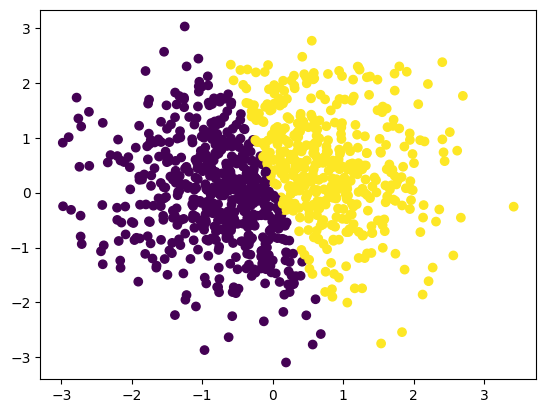

In [79]:
def generate_dataset_for_classification(n_samples, n_features, n_classes, center_box: tuple = (-10.0, 10.0), random_state: int = 42):
    np.random.seed(random_state)
    centers = np.random.uniform(low=center_box[0], high=center_box[1], size=(n_classes, n_features))
    X = np.zeros((n_samples, n_features))
    y = np.zeros((n_samples, 1))
    for i in range(n_samples):
        center = np.random.choice(n_classes)
        sample = np.random.normal(loc=centers[center], scale=1.0)
        X[i, :] = sample
    
    # TODO implement own version of Kmeans
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=n_classes)
    kmeans.fit(X)
    y = kmeans.labels_
    return X, y
    

X, y = generate_dataset_for_classification(1000, 2, 2, center_box=(-1,1), random_state=3)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linearly_separable_data(num_samples, dim, distance_threshold):
    # Mean of the two distributions
    mean1 = np.zeros(dim)
    mean2 = np.ones(dim)

    # Covariance matrices for the distributions
    cov = np.eye(dim) * 0.5  # Scaled identity matrix

    # Generate samples
    X1 = np.random.multivariate_normal(mean1, cov, num_samples)
    X2 = np.random.multivariate_normal(mean2, cov, num_samples)

    # Combine the samples
    X = np.vstack((X1, X2))
    y = np.hstack((np.zeros(num_samples), np.ones(num_samples)))

    # Calculate midpoint between the means
    midpoint = (mean1 + mean2) / 2

    # any point along the line connecting the two means should be removed 
    v_hat = (mean2 - mean1).T / np.linalg.norm(mean2 - mean1)

    projections = np.dot(X, v_hat).dot(v_hat)
    X = X[np.linalg.norm(X - projections) > distance_threshold)]


    # Remove points too close to the midpoint
    distances = np.linalg.norm(X - midpoint, axis=1)
    keep = distances > distance_threshold
    X = X[keep]
    y = y[keep]

    return X, y

# Generate data
X, y = generate_linearly_separable_data(num_samples=100, dim=2, distance_threshold=0.5)

# Plotting
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Data')
plt.legend()
plt.show()


SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (16556225.py, line 27)

In [ ]:
points = np.array([[1,1],[1,2],[3,2],[3,3]])

mid = np.mean(points, axis=0).reshape(-1, 1)
ortho_mid = mid.T / np.linalg.norm(mid)

print(ortho_mid)

projects = np.dot(points, ortho_mid.T).dot(ortho_mid)

plt.scatter(points[:, 0], points[:, 1])
plt.scatter(mid[0], mid[1])
plt.scatter(dif_mid[:, 0], dif_mid[:, 1])
plt.scatter(projects[:, 0], projects[:, 1])
plt.legend(['points', 'mid', 'dif_mid', 'projects'])
plt.show()